In this module i will show step by step simplified approch used to predict a message is spam or ham using Natural Language Processing(NLP). For this we will use the SMSSpamCollection dataset which is available on the official website of UCI - https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
download the dataset from the above link and save it to the same locationa at which your jupyter notebook runs. (i'm using Jupyter notebook to run my python code, you can use any but jupyter is good).
Now we have the dataset, the dataset contains messages and its label( spam or ham), So first we will load the dataset and see aal the information related to the dataset. The below code loads the dataset and prints the number of messages in the dataset. 


In [13]:
message=[line.rstrip() for line in open('SMSSpamCollection')]
print(len(message))

5574


Now using enumerate we will assign each message with number.Code shown below

In [14]:
for message_no, message in enumerate(message[:10]):
    print (message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Now using pandas we will make 2 columns named 'label' and 'message'. column label contains the label of the message( spam or ham) and the column 'message' contains the message. 

In [19]:
#dataframe generation
import pandas
message=pandas.read_csv('SMSSpamCollection', sep='\t', names=["label", 'message'])


In [20]:
#printing how the dataframe looks. 
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now by using the descridbe method of the pandas we can know  the description of the dataset. Below shows the description of the message, and it shows differet property for label and message like count , unique , top and freq.


In [21]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Similarly we can describe the message by label

In [22]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Now using only the message its very hard task to machine to predict that the message is spam or ham because there are more variation, So the computer will give less accurate result, so we will firt creaate an feture which will increase the efficiency of the algorithm to predict the  message is  spam or ham. To do this we will calculate the length of each message, because using the length feature it will be easier for the machine to train and predict. So, below code createsand column named length which contins the length of the message. 

In [23]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now lets plot the lenght of the messahe with respect to the frequency( number of times message with that same length appers in the dataset, see the below plot to get the clear understanding), the below plot shows that there are around 1500 message in the dataset which are  of lenght around 20.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'length of message')

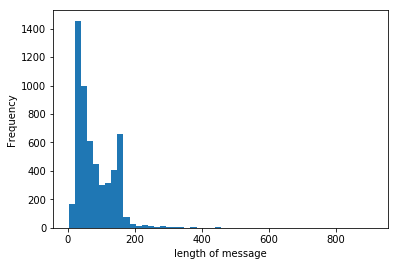

In [98]:
message['length'].plot(bins=50, kind='hist')
plt.xlabel('length of message')

The below code some statics of the length column of the dataframe

In [26]:
message.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

From the above statical factor it is seen that there is a message of length 910. So lets use pandas to loate(see) that messagee of length 910 character. Below shows the result

In [27]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

So now one more thing that we can do is that we can saperately plot the graph of spam and ham with respect to their length. This can be done using hist by just specifying by = 'label' and column= 'length'. From the below result of the plot you will observe that the message with length of arount 150 is high chance of beging spam. See the below plot and observe

Text(0.5, 0, 'length of message')

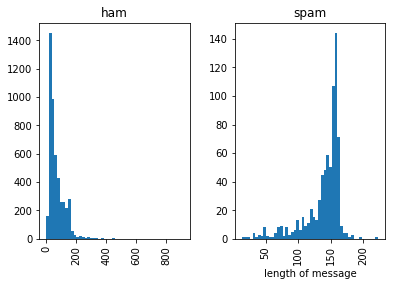

In [103]:
message.hist(column='length', by='label', bins=50)
plt.xlabel('length of message')


Now before proceding further we need to do cleaning of the text of the message because in the message there are a lots of unwanted words such as punctuation, stopwords(is, or, that,...), for the cleaning of the text we will use the most popular library nltk. we will  remove the punctuation and stopwords. first we will remove punctuation from a test message mess and then we will create a function to remove all the message from the text message column of the dataset.

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
import string

In [32]:
mess="hi! Notice: it has ball."

n=[char for char in mess if char not in string.punctuation]

n=''.join(n)

In [33]:
cmess=[word for word in n.split() if word.lower() not in stopwords.words('english')]

In [34]:
cmess

['hi', 'Notice', 'ball']

In [35]:
def text(mess):
    n=[char for char in mess if char not in string.punctuation]
    
    n=''.join(n)
    
    cmess=[word for word in n.split() if word.lower() not in stopwords.words('english')]
    
    return cmess

In [36]:
message['message'].apply(text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [37]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now lets create context of the message 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
tf=CountVectorizer(analyzer=text).fit(message['message'])

In [40]:
len(tf.vocabulary_)

11425

In [41]:
message4=message['message'][3]

In [42]:
message4

'U dun say so early hor... U c already then say...'

In [43]:
b=tf.transform([message4])

In [44]:
print(b)
print(b.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [45]:
print(tf.get_feature_names()[9554])

say


In [46]:
tmessage=tf.transform(message['message'])

In [47]:
print(tmessage.shape)

(5572, 11425)


In [50]:
#100*nonzero/nonzero[0]*shape[1]

In [51]:
print((100*tmessage.nnz)/(tmessage.shape[0]*tmessage.shape[1]))

0.07940295412668218


In [52]:
print(tmessage.nnz)

50548


In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
fidtf=TfidfTransformer().fit(tmessage)

In [55]:
tf4=fidtf.transform(tmessage)

In [56]:
print(tf4)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [57]:
print(fidtf.idf_[tf.vocabulary_['say']])

5.231239632897098


In [58]:
print(tf4.shape)

(5572, 11425)


Now we will use the sklearn.naive_bayes to train the model for the prediction, we will train the model according to the tfidf

In [63]:
#multinomialNB will use the  actiation function according to the data 
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detec = MultinomialNB().fit(tf4, message['label'])

After training of the model we will predict the label(message is ham or spam) as shown below

In [66]:
print('Predict', spam_detec.predict(tf4)[0])

Predict ham


In [67]:
print('Actual', message.label[3])

Actual ham


In [69]:
all_prediction = spam_detec.predict(tf4)

In [70]:
print(all_prediction)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [92]:
from sklearn.metrics import classification_report

Now lets use another function of sklearn, classification_report to know the accuracy of the model.

In [93]:
print(classification_report(message['label'], all_prediction))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [104]:
#now we know how to create a pipeline of rst api

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
msg_train, msg_test, label_train, label_test = train_test_split(message['message'], message['label'], test_size= 0.2)

In [78]:
print(msg_train)

2219    Nice talking to you! please dont forget my pix...
4169    Congrats! Nokia 3650 video camera phone is you...
3019         I didn't get the second half of that message
251          Ranjith cal drpd Deeraj and deepak 5min hold
5183                  Fuuuuck I need to stop sleepin, sup
4004    somewhere out there beneath the pale moon ligh...
1656                               At 7 we will go ok na.
1499    Time n Smile r the two crucial things in our l...
1990    The basket's gettin full so I might be by tonight
456       Si si. I think ill go make those oreo truffles.
3108    Hi. Happy New Year. I dont mean to intrude but...
3191    Hi neva worry bout da truth coz the truth will...
737     Thanks for looking out for me. I really apprec...
4181    swhrt how u dey,hope ur ok, tot about u 2day.l...
5550          Cool, what time you think you can get here?
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
5337              My birthday is on feb  &lt;#&gt;  da. .
2595    That‘s

In [79]:
from sklearn.pipeline import Pipeline

In [87]:
spam_detect = Pipeline([('bow', CountVectorizer(analyzer= text)), 
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [88]:
spam_detect.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text at 0x000002455489F598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [89]:
prediction = spam_detect.predict(msg_test)

In [95]:
print(classification_report(prediction, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       996
        spam       0.75      1.00      0.86       119

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.97      0.97      0.97      1115

